## COMP SCI 524 - Homework 10

## Jingde Wan

### Q1

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:       70
Number of nonzeros in Lagrangian Hessian.............:      192

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        6
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:       20
        inequality constraints with only lower bounds:        5
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       15

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

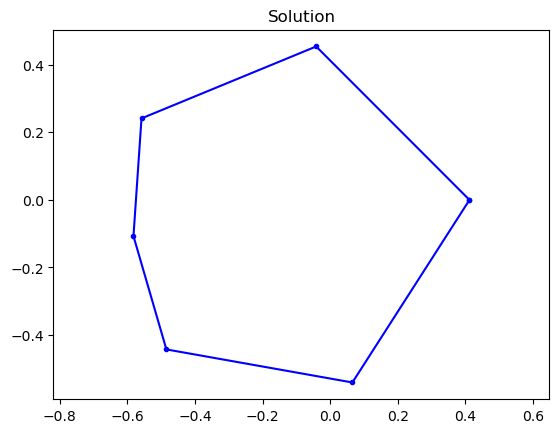

LOCALLY_SOLVED
Optimal area: 0.6749814494331469


In [3]:
# Question 1 starter


using PyPlot, JuMP, Ipopt
n = 6

m = Model(Ipopt.Optimizer)
@variable(m, 0 <= r[1:n] <= 1 )
@variable(m, θ[1:n]  )

# impose an order to the angles
@constraint(m, θ[1] == 0)
for i in 1:n-1
    @constraint(m, θ[i+1] >= θ[i])
end

# hexagon's diameter does not exceed 1
for i in 1:n
    for j in i+1:n
        # distance between two polar coordinates <= 1
        @NLconstraint(m, (r[i])^2+(r[j])^2-2*r[i]*r[j]*cos(θ[i]-θ[j]) <= 1)
    end
end

@NLobjective(m, Max, 0.5*sum( r[i]*r[i+1]*sin(θ[i+1]-θ[i]) for i=1:n-1) + 0.5*r[1]*r[n]*sin(θ[1]-θ[n]))
optimize!(m)

println(termination_status(m))
println("Optimal area: ", objective_value(m))

# plot the hexagon
R = [value.(r); value(r[1])]
T = [value.(θ); value(θ[1])]

X = R .* cos.(T)
Y = R .* sin.(T)

axis("equal")
plot(X,Y,"b.-")

title("Solution")
;


### Q2

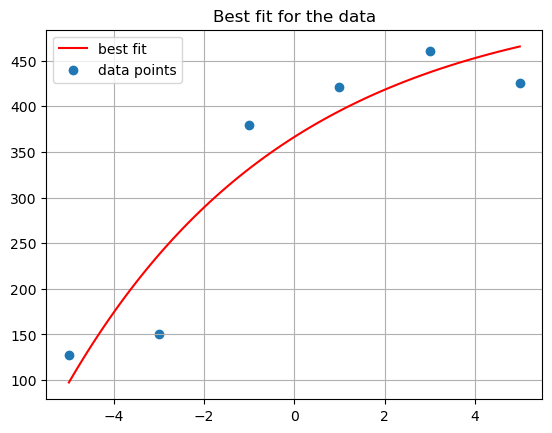

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [11]:
# Question 2 starter
using JuMP, Ipopt, PyPlot

x = [-5, -3, -1, 1, 3, 5]
y = [127, 151, 379, 421, 460, 426]

n = 6

m = Model(Ipopt.Optimizer)

@variable(m, k[1:3])

@NLobjective(m, Min, sum( (y[i]-(k[1] + k[2]*exp(k[3]*x[i])))^2 for i=1:n ))

set_start_value(k[1],500)
set_start_value(k[2],-200)
set_start_value(k[3],-1)

optimize!(m)
println(termination_status(m))
# println("Optimal area: ", objective_value(m))

k1 = value.(k[1])
k2 = value.(k[2])
k3 = value.(k[3])
println(k1, k2, k3)

# Plot the data and the best-fit curve
xv = range(-5, stop=5, length=100)
# plot some curve (replace this with the real thing)
yv = k1 .+ k2 .* exp.(k3 .* xv)

scatter(x, y, label="data points")
plot(xv, yv, "r-", label="best fit")
grid()
legend(loc="best"); title("Best fit for the data")

;